In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [12]:
import os

"""
OS module provides allows you to interface with the underlying operating system that Python
"""

'\nOS module provides allows you to interface with the underlying operating system that Python\n'

In [3]:
# use the iris data sert to understand decision trees
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # note that we can aslo use a regressor for predicting values


In [4]:
iris = load_iris()

In [6]:
X = iris.data[:, 2:] #data all rows and columns starting at 2 through end
y = iris.target

In [7]:
tree_clf = DecisionTreeClassifier(max_depth = 2) # we know that this data set only has a couple of features
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
# import the export graph visualization package
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf # function we are visualizing 
        , out_file = "iris_tree.dot" # saving it as a .dot file in word, can be now be converted to PDF
        , feature_names = iris.feature_names[2:] # assigning labels
        , class_names = iris.target_names # assigning target labesl 
        , rounded = True # round the corners
        , filled = True # color fill 
)

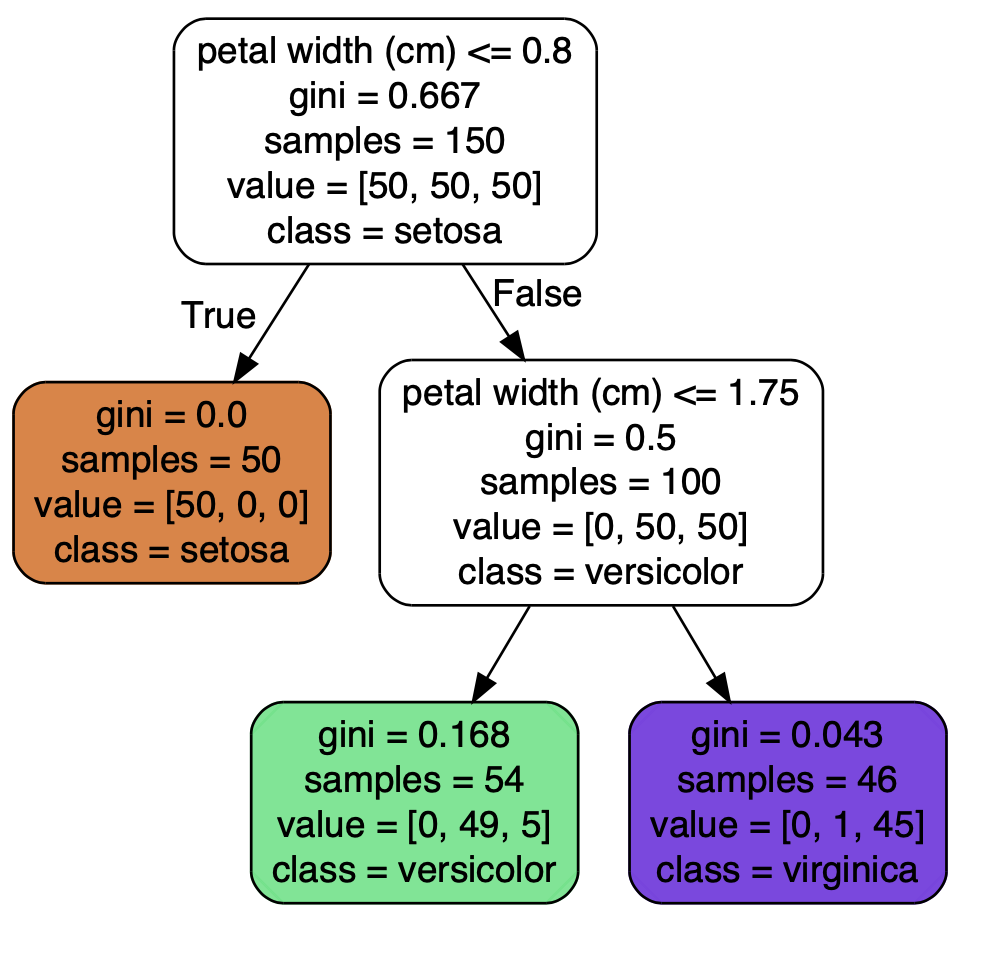

In [22]:
# print decision tree file saved on local 
from IPython.display import Image
Image(filename='Iris_DTree.png') 

The nice thing about decision trees is that they do not require features to be scaled or centered. This does not mean that we still do not have the clean the data. The iris data set is a good way to use decion trees (at least for training), but it is important to rememeber that it is a clean data set!!!

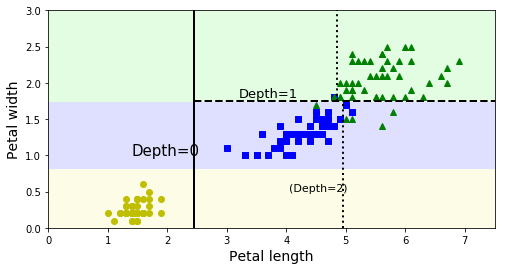

In [17]:
# plot the decision function of the tee
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()


As you can see here, decision trees are nice becuase they are easily read (White Box) we can see where the tree made the cuts. These are based on the Gini impurity funtion. By minimizing the gini, we are are removing the impurities. Look at the bottom of the graph where we have complete isolation of the Setosa flowers. We see a correpsinding Gini score of ZERO which means we have no impurity. This decision was made by the decision tree based off of a petal width of less than or equal (<=) to 0.8 cm. We can confrim this visually by looking at the yellow backgrounf fill. The next cut off by the tree is made at a petal width of less than or equal (<=) 1.75 cm. We do some some over lap of the Versicolor and Virginica class. The tree made this decision because the Gini impurity is minimized here for Versi at 0.168 and Virgin at 0.043. For this tree, any other combination would result in a higher impurity score for either(or both). See the dot.tree for more

In [23]:
# we can also use a decision tree to estime class probabulities 
tree_clf.predict_proba([[5, 1.5]]) # Petal length of 5, and petal width of 1.5 (all centimeter)

array([[0.        , 0.90740741, 0.09259259]])

We are now returned an array, there is a zero probaility that the new instance is a Sesota, a 90%+ chance that the flower is a Versicolor and 10% chance that the flower is a Virginica 

In [24]:
# we can predict the outcome without probabilites if you want something more immediate
tree_clf.predict([[5, 1.5]])

array([1])

The tree predictis that it under traget index 1 which is Versicolor

In [25]:
tree_clf.predict_proba([[6, 1.5]]) # Petal length of 6, and petal width of 1.5 (all centimeter)

array([[0.        , 0.90740741, 0.09259259]])

In [26]:
tree_clf.predict([[6, 1.5]])

array([1])

Here we see the tree making a mistake. Based off the gini impurity, the tree is making the cut off from the petal width. Mathmatically this is the best choice since we are looking to minimize the gini impurity, however, looking a the plot we see that most flowers with a length in that range should be Virginica, we only have 2 Veriscolor flowers that meet this criteria vs 4 Virginica. This is because the estimated probabilities are indentical anywhere within the decision boundry (Same gini min function). 

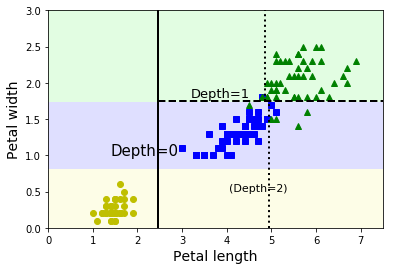

In [28]:
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

# Deeper examination of hyper parameter tuning

 Because decision trees have lots of room to move (no real assumptions about the data) they are in danger of overfitting. We can minimize the risk of overfitting by limiting the maximum depth to which the tree is allowed to split the data or the minimun number of samples. We have already seen this in the iris data set. Now we will use the moons data set (from sklearn) so that we have some more variables to work with.

This data set is known as "Make Moons" because it is an algorithm designed to randomly generate data which result in two interleaving half circles (which look like moons)

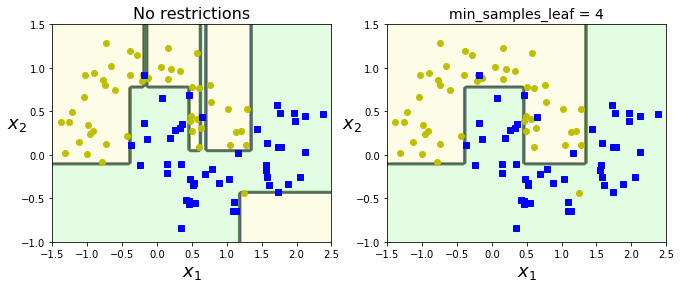

In [30]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples = 100, noise = 0.25, random_state = 53) # Using Xm and ym so we dont over right our old data

deep_tree_clf1 = DecisionTreeClassifier(random_state = 42) # no restrictions
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 4, random_state = 42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes = [-1.5, 2.5, -1, 1.5], iris = False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes = [-1.5, 2.5, -1, 1.5], iris = False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize = 14)

plt.show()

The 'No Restrictions' model on the left has overfit the data. The model on the right (with restrictions) will generalize better. 

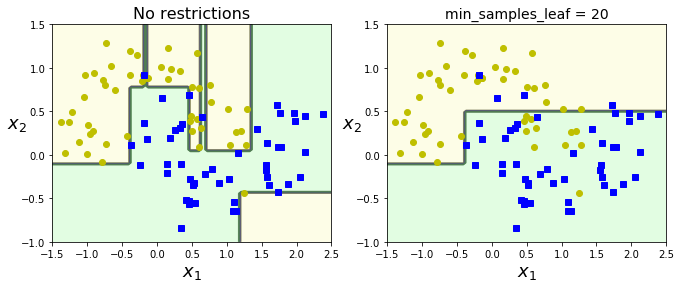

In [38]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples = 100, noise = 0.25, random_state = 53) # Using Xm and ym so we dont over right our old data

deep_tree_clf1 = DecisionTreeClassifier(random_state = 42) # no restrictions
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 20, random_state = 42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes = [-1.5, 2.5, -1, 1.5], iris = False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes = [-1.5, 2.5, -1, 1.5], iris = False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize = 14)

plt.show()

# Decision Tree Regressor Training

Decision trees can be used for regression (predicting values). Training a tree on a quadratic data set with noise.

In [40]:
# Quadratic training set + noise

np.random.seed(42) # for reproduction
m = 200 # variables
X = np.random.rand(m, 1) # random values in a given shape
y = 4 * (X - 0.5) ** 2 # create y as a quadratic
y = y + np.random.randn(m, 1) / 10 

In [41]:
# load libraries
from sklearn.tree import DecisionTreeRegressor

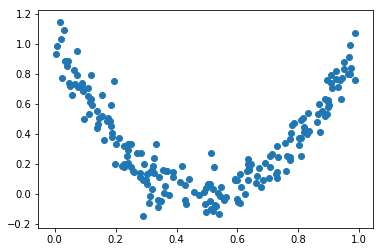

In [44]:
# visualize the data
plt.scatter(X, y)

In [42]:
tree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [45]:
export_graphviz(
        tree_reg
        , out_file = "regression_tree.dot"
        , feature_names =["X"]
        , rounded = True
        , filled = True
    )

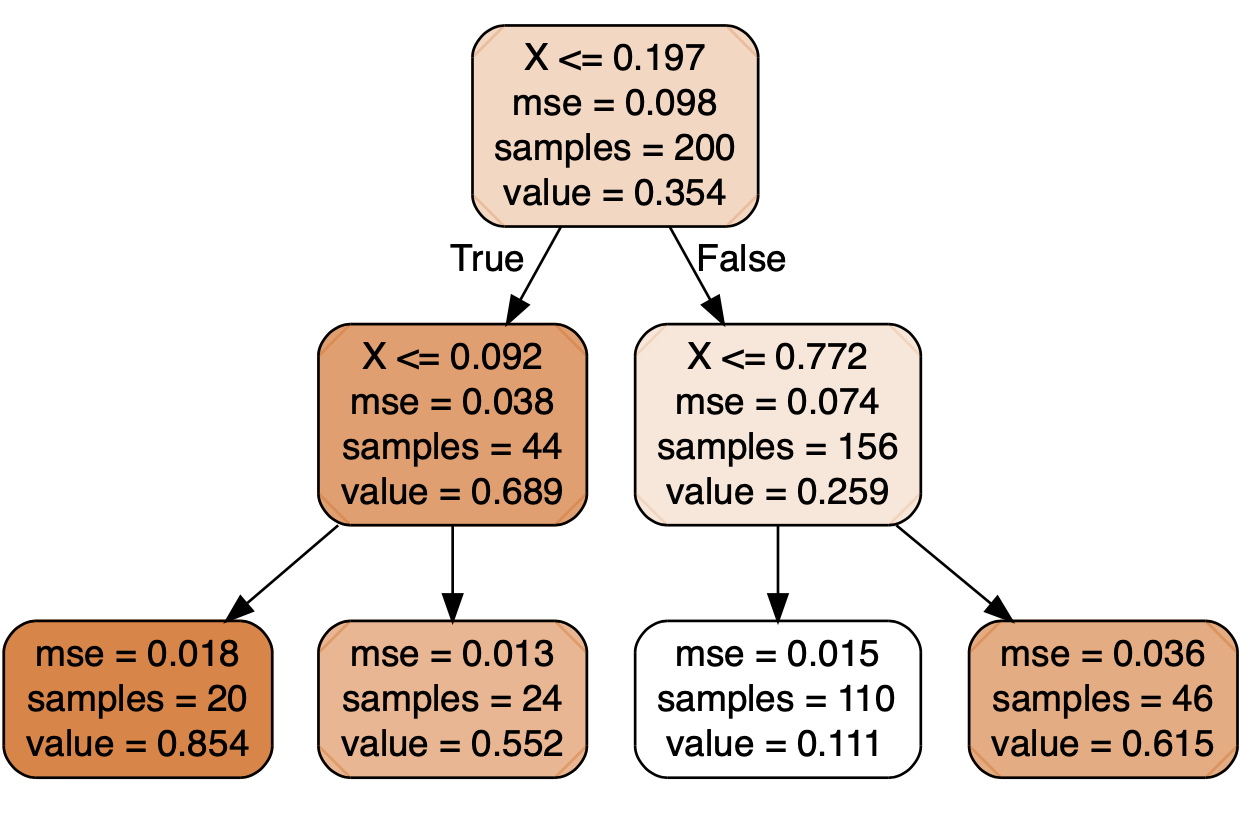

In [46]:
# print decision tree file saved on local 
from IPython.display import Image
Image(filename='Regression_tree.png') 

This tree is similar to the one we made earlier. The main difference is that instead of predicting classes, it predicts a value. The predicted value for each region is always the average target value of the instances in that region. The algorithm splots each region in a wau that makes most training instances as close as possoble to the predicted value. 

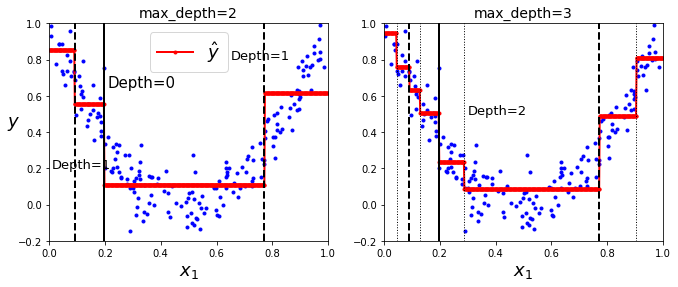

In [47]:
# two regression trees 
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2) # max depth 2
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3) # max depth 3
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()


The alorightm is still a minimazation funnction. When using a decision tree classifier, the alrogrithm was trying to minimize the Gini impurity. Now when we run the decision tree regressor, the alrogithm is trying to minimize the Mean Sqaured Error. Decision tree regressors are prone to over fitting. We contained this one by using max depth. In the following, we will not tune the parameters. 

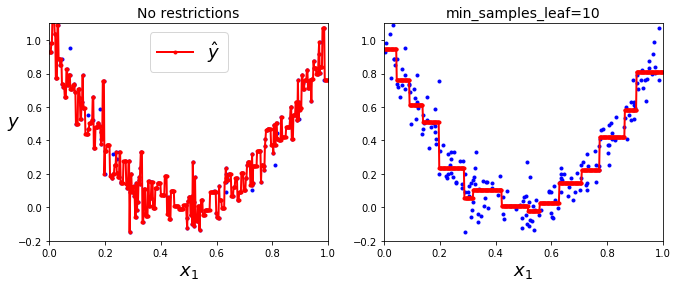

In [48]:
tree_reg1 = DecisionTreeRegressor(random_state=42) # only random state 
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10) # now limiting using min leaf samples
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$") # y-hat label
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

# Instability

Decision trees work through perpendicular splits to axies. This means that we can minimuplate the rotation of the data (good or bad) to adjust the decision boundry

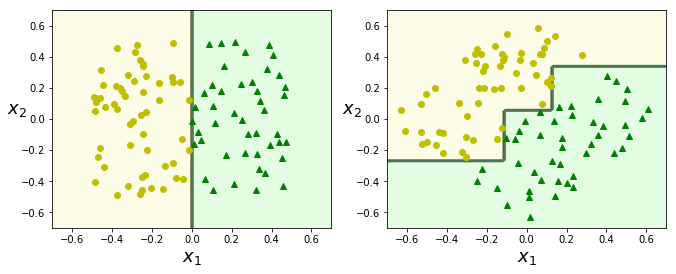

In [49]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

Both of these trees split the data perfectly. But the model on the right will generalize well. Therefore we may want to rotate the data or preprocess the data using a Principal Compenent Analysis (PCA). 